In [1]:
""" This simulation is to determine the relationships between different variables in the analysis of closure phases """

' This simulation is to determine the relationships between different variables in the analysis of closure phases '

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from random import *
from pylab import *
import math as m
import cmath as c
from numpy.lib.scimath import *

<IPython.core.display.Javascript object>


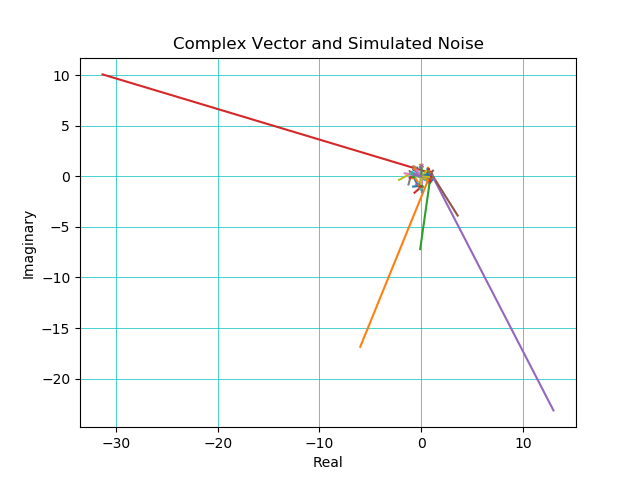

How many measurements? Enter here: 25
How many noise vectors? Enter here: 5


<IPython.core.display.Javascript object>


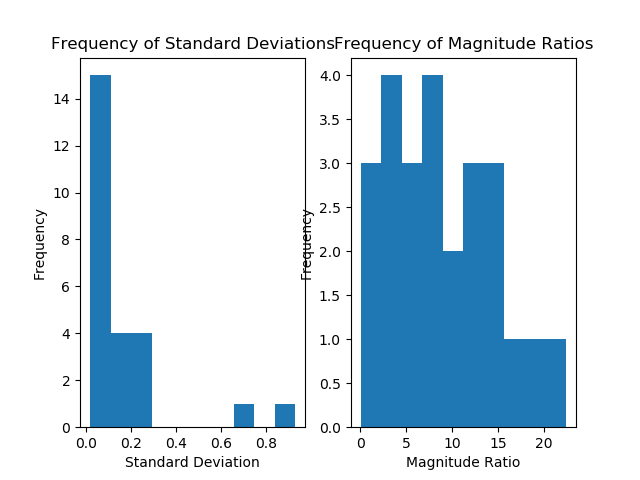

<IPython.core.display.Javascript object>


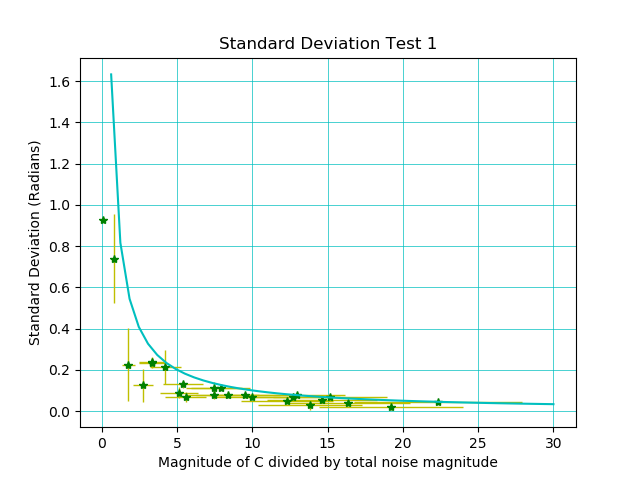

Standard deviation is calculated using the angle measurement of the closure phase without any adjustements for noise.
We can see that as the ratio of the magnitude of the closure phase and the magnitude of the 'noise' approaches zero, that is, as the amount of noise increases relative to the closure phase measurement, the standard deviation also increases


/home/kalbal/anaconda2/lib/python2.7/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/kalbal/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:93: RuntimeWarning: divide by zero encountered in divide
/home/kalbal/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:99: RuntimeWarning: divide by zero encountered in divide


<ErrorbarContainer object of 3 artists>

In [3]:
"""Standard Deviation plotted against the ratio of magnitudes"""

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
axes = plt.gca()
ax.grid(color='c', linestyle='-', linewidth=0.5)
plt.title('Complex Vector and Simulated Noise')
plt.xlabel('Real')
plt.ylabel('Imaginary')

# Empty arrays to define future variables

noise           = []
realnoise       = []
imgnoise        = []
noise_mag       = []
phi_C           = []
C_array         = []
phi_adjusted    = []
sigma           = []

N = input("How many measurements? Enter here: ")
N = int(N)       # Take the input and represent it as an integer 
M = input("How many noise vectors? Enter here: ")
M = int(M)       # Take the input and represent it as an integer 

SNRs = np.linspace(0.1,20,N)

for x in range (len(SNRs)):
    SNR      = SNRs[x] # Signal to noise ratio
    C_amp    = 1  
    C_phi    = 2*pi*np.random.rand()
    C        = C_amp * exp(1j*C_phi)
    C_array  = np.append(C_array, C)                                            # Many coordinates
    plt.plot([0, C.real], [0, C.imag])                                          # Plot these things as vectors
        
    # Simulate noise on top of this vector
    realnoise = []
    imgnoise = []
    noise = []
    for i in range (0,M):                                                       # Add five noise vectors per C
        noise_real_coord   = np.array([np.random.randn()])/SNR                  # Randomly generated real coord
        realnoise          = np.append(realnoise, noise_real_coord)             # Add to array of real coordinates
        noise_img_coord    = 1j*np.array([np.random.randn()])/SNR               # Randomly generated imaginary coord
        imgnoise           = np.append(imgnoise, noise_img_coord)               # Add to array
        noise_real         = np.add(noise_real_coord, C.real)                   # VECTOR: Add real coordinate to C
        noise_img          = np.add(noise_img_coord, 1j*C.imag)                 # VECTOR: Add imaginary coordinate to C
        noise1             = np.add(noise_real, noise_img)                      # Make it a pair
        noise              = np.append(noise, noise1)                           # Add it to an array
        plt.plot([C.real, noise1.real], [C.imag, noise1.imag])                  # Plot vectors from C to coordinate
    square_real = realnoise ** 2
    square_img = -imgnoise ** 2 
    noise_mag1 = np.sqrt(square_real + square_img).mean()
    noise_mag = np.append(noise_mag, noise_mag1)
    noise_phase = np.angle(noise)
    phase_cosine = np.cos(noise_phase).mean()
    phase_sine = np.sin(noise_phase).mean()
    R = np.sqrt((phase_cosine**2) + (phase_sine)**2)
    sigma_calc = np.sqrt(-2*np.log(R))
    sigma = np.append(sigma, sigma_calc)

    
divide_mag = C_amp / noise_mag

# Histograms
fig = plt.figure()    
ax = fig.add_subplot(1, 2, 1)
axes = plt.gca()
plt.title('Frequency of Standard Deviations')
plt.xlabel('Standard Deviation')
plt.ylabel('Frequency')
counts_sigma, bins_sigma, bars_sigma = plt.hist(sigma)
bins_sigma = np.array(bins_sigma)

ax = fig.add_subplot(1, 2, 2)
axes = plt.gca()
plt.title('Frequency of Magnitude Ratios')
plt.xlabel('Magnitude Ratio')
plt.ylabel('Frequency')
counts_mag, bins_mag, bars_mag = plt.hist(sqrt(abs(divide_mag**2)))
bins_mag = np.array(bins_mag)

    
# Standard Deviation Test 1: Plotting the ratio in magnitudes against sigma
fig = plt.figure()    
ax = fig.add_subplot(1, 1, 1)
axes = plt.gca()
ax.grid(color='c', linestyle='-', linewidth=0.5)
plt.title('Standard Deviation Test 1')
plt.xlabel('Magnitude of C divided by total noise magnitude')
plt.ylabel('Standard Deviation (Radians)')
plt.plot(divide_mag, sigma, 'g*')
plt.plot(np.linspace(0,30,50), 1/np.linspace(0,30,50), 'c')
print("Standard deviation is calculated using the angle measurement of the closure phase without any adjustements for noise.")
print("We can see that as the ratio of the magnitude of the closure phase and the magnitude of the 'noise' approaches zero, that is, as the amount of noise increases relative to the closure phase measurement, the standard deviation also increases")

# Error Bars
xerr = ((1/(noise_mag**2))/divide_mag)*0.25
yerr = ((1/(np.linspace(0,30,N))**2)/sigma)*0.25
plt.errorbar(divide_mag, sigma, xerr = xerr, yerr = yerr, fmt = 'none', ecolor = 'y', elinewidth=1)

